In [2]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfdf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
imdb, info = tfdf.load('imdb_reviews', with_info=True, as_supervised=True)

In [4]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences= []
testing_labels = []

for s,l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())
    
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


2024-04-16 16:47:49.481301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-16 16:47:50.976951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(training_sentences)
padded_train = pad_sequences(train_sequences, truncating='post', maxlen=120)

test_sequences = tokenizer.texts_to_sequences(testing_sentences)
padded_test = pad_sequences(test_sequences, truncating='post', maxlen=120)

In [6]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [15]:
# model 1 : Flatten()

model_flatten = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=120),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_flatten.compile(loss='binary_crossentropy',
                      metrics=['accuracy'],
                      optimizer='adam')

model_flatten.summary()

/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
history_flatten = model_flatten.fit(padded_train, training_labels_final,
                            epochs=10,
                            validation_data = (padded_test, testing_labels_final))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6158 - loss: 0.6143 - val_accuracy: 0.7974 - val_loss: 0.4299
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9003 - loss: 0.2584 - val_accuracy: 0.8142 - val_loss: 0.4175
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.1042 - val_accuracy: 0.8033 - val_loss: 0.5071
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9963 - loss: 0.0261 - val_accuracy: 0.7915 - val_loss: 0.6395
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9989 - loss: 0.0076 - val_accuracy: 0.8048 - val_loss: 0.6713
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: 0.0035 - val_accuracy: 0.8044 - val_loss: 0.7356
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.8253e-04 - val_accuracy: 0.8052 - val_loss: 0.7794
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0070 - val_accuracy

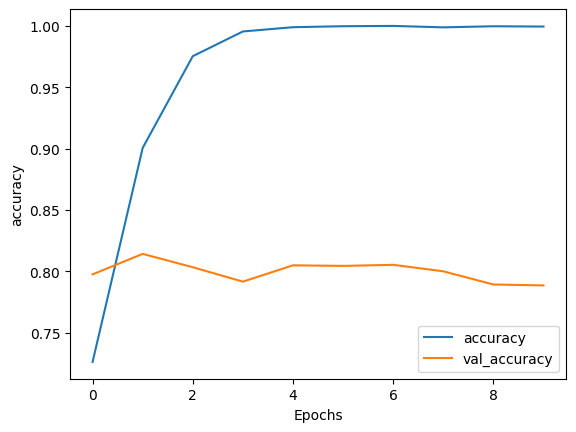

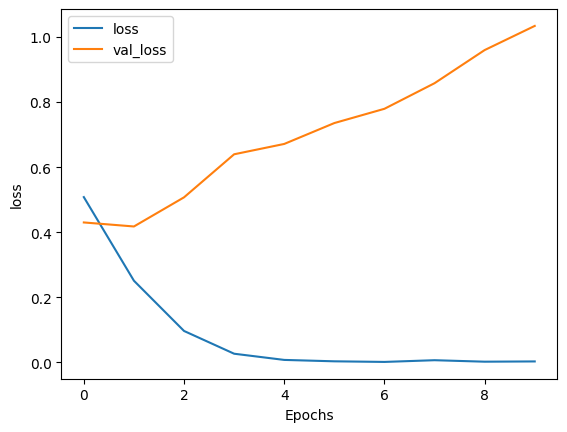

In [17]:
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

In [11]:
# model 3 - GRU

model_gru = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer='adam')

model_gru.summary()

/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history_gru = model_gru.fit(padded_train, training_labels_final,
                            epochs=10,
                            validation_data = (padded_test, testing_labels_final))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.5753 - loss: 0.6514 - val_accuracy: 0.8168 - val_loss: 0.4042
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8682 - loss: 0.3242 - val_accuracy: 0.8278 - val_loss: 0.3873
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9094 - loss: 0.2341 - val_accuracy: 0.8260 - val_loss: 0.4503
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9394 - loss: 0.1681 - val_accuracy: 0.8116 - val_loss: 0.4759
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9577 - loss: 0.1231 - val_accuracy: 0.8145 - val_loss: 0.5627
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9771 - loss: 0.0756 - val_accuracy: 0.8048 - val_loss: 0.7062
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9859 - loss: 0.0489 - val_accuracy: 0.8075 - val_loss: 0.8413
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9912 - loss: 0.0301 - 

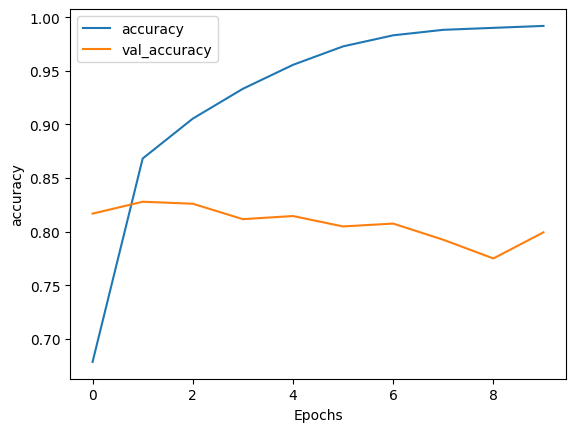

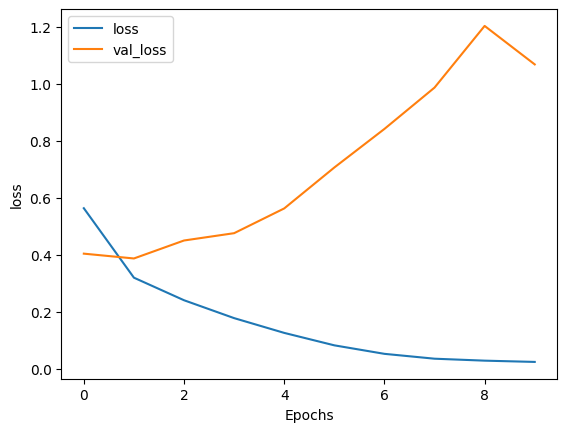

In [13]:
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

In [16]:
# model 4 - Convolution

model_conv = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=120),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_conv.compile(loss='binary_crossentropy',
                   metrics=['accuracy'],
                   optimizer='adam')

model_conv.summary()

/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history_conv = model_conv.fit(padded_train, training_labels_final,
                              epochs=10,
                              validation_data = (padded_test, testing_labels_final))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6337 - loss: 0.6322 - val_accuracy: 0.8148 - val_loss: 0.4773
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8528 - loss: 0.4118 - val_accuracy: 0.8262 - val_loss: 0.4198
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9116 - loss: 0.2842 - val_accuracy: 0.8249 - val_loss: 0.4261
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9536 - loss: 0.1885 - val_accuracy: 0.8192 - val_loss: 0.4594
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9705 - loss: 0.1297 - val_accuracy: 0.8190 - val_loss: 0.5200
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9799 - loss: 0.0977 - val_accuracy: 0.8160 - val_loss: 0.6521
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9809 - loss: 0.0885 - val_accuracy: 0.8162 - val_loss: 0.6904
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9826 - loss: 0.0793 - val_accuracy: 0.

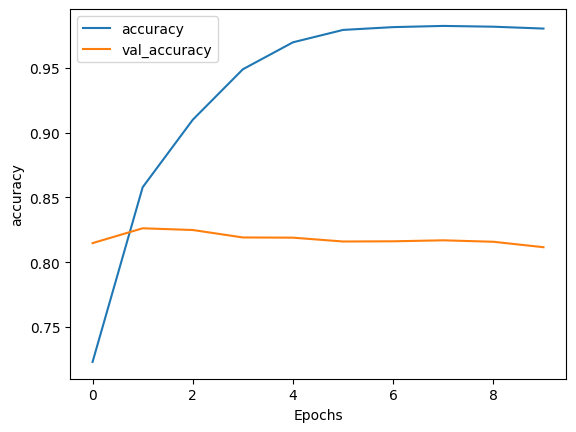

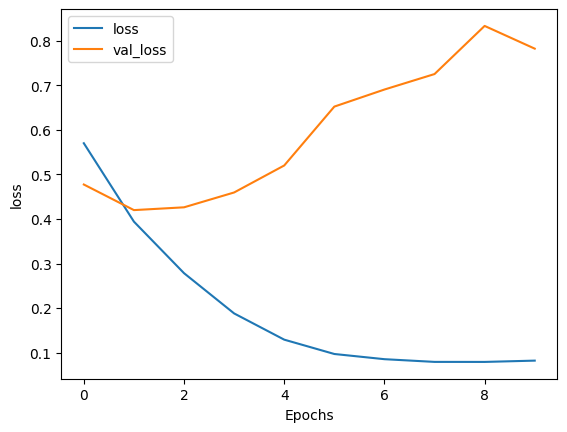

In [19]:
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')